In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datamining/datasets/breast-cancer.csv') # Ubah sesuai dengan lokasi relatif file breast-cancer.csv
df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,BC,>= 50,Senior high school,Housewife,Marriage,12 to 13,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Obesity,Minangnese
1,Non-BC,>= 50,Vocational degree,Master's student,Single/ widow,>13,< 50 years,>30 years,>= Multiparous,<12 months,High,Normal,Minangnese
2,BC,>= 50,Senior high school,Housewife,Marriage,7 to 11,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Normal,Javanese
3,Non-BC,>= 50,Senior high school,Master's student,Marriage,12 to 13,< 50 years,20-29 years,Primiparous,>=12 months,High,Normal,Javanese
4,BC,>= 50,Senior high school,Private servant,Marriage,>13,< 50 years,20-29 years,>= Multiparous,>=12 months,High,Normal,Minangnese


## Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('datasets/breast-cancer.csv')
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     2
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

<Axes: xlabel='First pregnancy'>

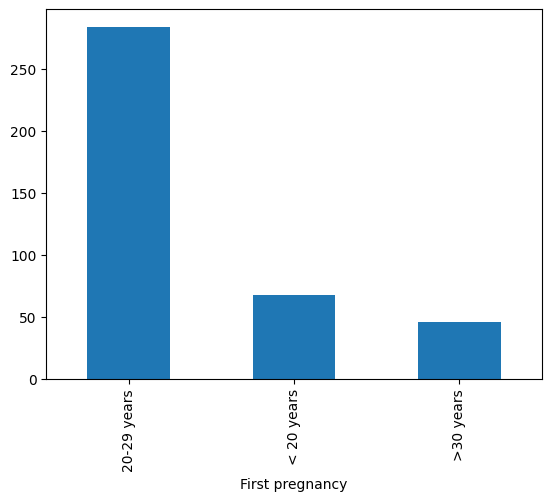

In [5]:
df['First pregnancy'].value_counts().plot.bar()

In [6]:
df['First pregnancy'] = df['First pregnancy'].fillna('20-29 years')

In [7]:
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     0
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

In [8]:
# Mengubah data kategorikal menjadi numerik
label_encoder = LabelEncoder()
for column in df.columns.drop('Grouping'):
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

# Memisahkan atribut dan label
X = df.drop('Grouping', axis=1)
y = df['Grouping']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Jumlah Data Train: {}".format(len(X_train)))
print("Jumlah Data Test: {}".format(len(X_test)))

  Grouping  Age (years)  Education  Working status  Marital status  \
0       BC            1          4               3               0   
1   Non-BC            1          6               4               1   
2       BC            1          4               3               0   
3   Non-BC            1          4               4               0   
4       BC            1          4               5               0   

   Menarche (years)  Menopause  First pregnancy  Parity  Breastfeeding  \
0                 0          0                0       0              1   
1                 2          0                2       0              0   
2                 1          0                0       0              1   
3                 0          0                0       2              1   
4                 2          0                0       0              1   

   Highfat  BMI  Ethnicity  
0        1    1          1  
1        0    0          1  
2        1    0          0  
3        0    0   

## Klasifikasi dengan Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Proses Klasifikasi, dengan semua fitur tanpa tuning parameter
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) #y_pred digunakan untuk mengevaluasi kinerja model dengan membandingkan y_pred dengan y_test

# Tampilkan hasil klasifikasi dengan classification report
print(classification_report(y_test, y_pred))

# Tampilkan akurasi, precision, recall, dan f1 score
print("Akurasi: {}".format(accuracy_score(y_test, y_pred))) # rasio dari jumlah prediksi benar terhadap total jumlah sampel
print("Precision: {}".format(precision_score(y_test, y_pred, average='macro'))) # proporsi dari prediksi benar (positif) terhadap semua sampel yang diprediksi sebagai kelas tertentu
print("Recall: {}".format(recall_score(y_test, y_pred, average='macro'))) 
print("F1 Score: {}".format(f1_score(y_test, y_pred, average='macro')))

              precision    recall  f1-score   support

          BC       0.75      0.80      0.77        45
      Non-BC       0.72      0.66      0.69        35

    accuracy                           0.74        80
   macro avg       0.73      0.73      0.73        80
weighted avg       0.74      0.74      0.74        80

Akurasi: 0.7375
Precision: 0.734375
Recall: 0.7285714285714286
F1 Score: 0.7303803562831006


In [11]:
# Fungsi visualisasi cross validation score
def visualization(data_y_test, data_y_pred, fig_title, fig_x_label, fig_y_label):

    # Asumsikan y_test dan y_pred sudah didefinisikan
    report = classification_report(data_y_test, data_y_pred, output_dict=True)

    # Konversi dictionary ke DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Drop kolom 'support' karena biasanya tidak diperlukan untuk visualisasi
    report_df = report_df.drop(columns=['support'])
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

    # Reset index untuk mengatur ulang kolom indeks sebagai kolom normal
    report_df = report_df.reset_index()

    # Ubah DataFrame menjadi format panjang (long format)
    report_melted = pd.melt(report_df, id_vars=['index'], value_vars=['precision', 'recall', 'f1-score'],
                            var_name='Metric', value_name='Value')

    # Mengganti nama kolom untuk kejelasan
    report_melted.rename(columns={'index': 'Class'}, inplace=True)

    # Plotting menggunakan seaborn countplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y='Value', hue='Metric', data=report_melted)

    # Menambahkan title dan label
    plt.title(fig_title)
    plt.xlabel(fig_x_label)
    plt.ylabel(fig_y_label)
    plt.ylim(0, 1)  # Pastikan y-axis berada dalam rentang 0 sampai 1 karena metrik berada dalam rentang ini

    # Menampilkan plot
    plt.legend(loc='upper right')
    plt.show()

    # Menampilkan plot
    return plt.show()

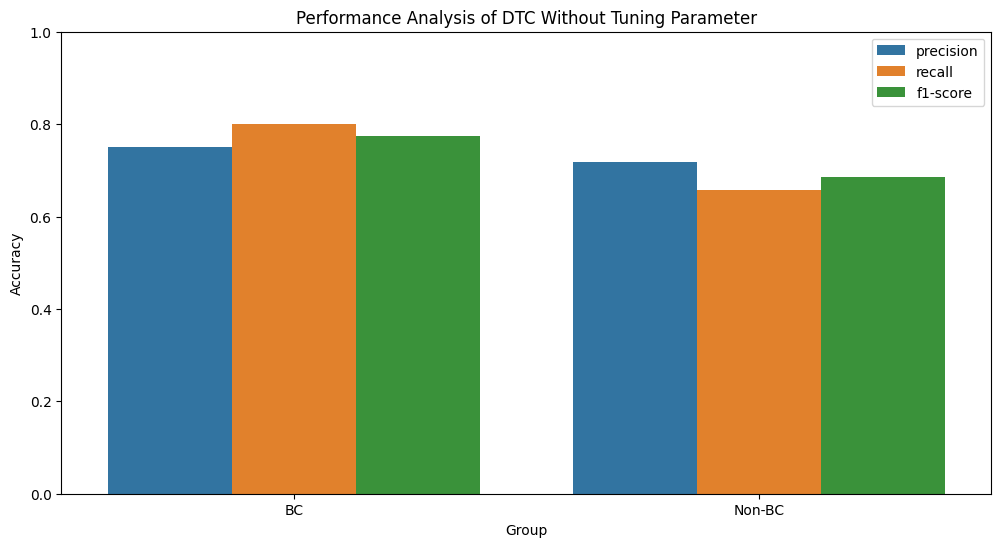

In [12]:
visualization(y_test, y_pred, 'Performance Analysis of DTC Without Tuning Parameter', 'Group', 'Accuracy')

# TOP 6 FEATURES

Top 6 features berdasarkan proses feature selection:
- Breastfeeding
- Highfat
- Parity
- Menopause
- Education 
- Age (years)

In [13]:
# Proses Klasifikasi, dengan 6 fitur terbaik tanpa tuning parameter
top_6 = ['Breastfeeding', 'Highfat', 'Parity', 'Menopause', 'Education', 'Age (years)']
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train[top_6], y_train)
y_pred = clf.predict(X_test[top_6])

print(classification_report(y_test, y_pred))

print("Akurasi: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 Score: {}".format(f1_score(y_test, y_pred, average='macro')))

              precision    recall  f1-score   support

          BC       0.77      0.96      0.85        45
      Non-BC       0.92      0.63      0.75        35

    accuracy                           0.81        80
   macro avg       0.84      0.79      0.80        80
weighted avg       0.83      0.81      0.81        80

Akurasi: 0.8125
Precision: 0.8422619047619048
Recall: 0.7920634920634921
F1 Score: 0.7986239301896292


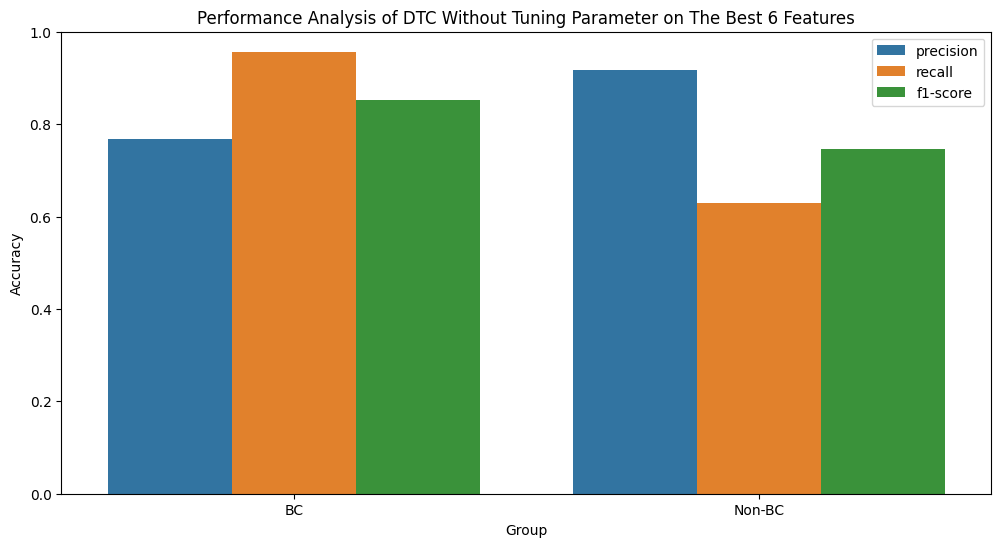

In [14]:
visualization(y_test, y_pred, 'Performance Analysis of DTC Without Tuning Parameter on The Best 6 Features', 'Group', 'Accuracy')

In [15]:
# Lakukan cross validation dengan 10 fold dengan StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
clf = DecisionTreeClassifier(random_state=1)
accuracy_scores = cross_val_score(clf, X_train[top_6], y_train, cv=skf, scoring='accuracy')

# Pilih nilai fold dengan akurasi tertinggi
for i, acc in enumerate(accuracy_scores):
	print("Fold ke-{}: {}".format(i+1, acc))

print("Akurasi tertinggi: {}".format(accuracy_scores.max()))

Fold ke-1: 0.71875
Fold ke-2: 0.71875
Fold ke-3: 0.78125
Fold ke-4: 0.875
Fold ke-5: 0.71875
Fold ke-6: 0.875
Fold ke-7: 0.75
Fold ke-8: 0.5625
Fold ke-9: 0.84375
Fold ke-10: 0.78125
Akurasi tertinggi: 0.875


In [16]:
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, 11), accuracy_scores, color='skyblue', edgecolor='black')
# plt.xlabel('Fold ke-')
# plt.ylabel('Accuracy')
# plt.title('Accuracy per Fold - 10 Fold Stratified Cross Validation')
# plt.xticks(range(1, 11))
# plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
# plt.axhline(y=accuracy_scores.max(), color='red', linestyle='--', label='Akurasi Tertinggi')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [17]:
# accuracy_scores

### MENGAMBIL FOLD TERBAIK DARI CROSS VALIDATION

In [18]:
# Lakukan manual cross validation dengan 10 fold, kemudian pilih fold yang memiliki akurasi tertinggi untuk digunakan sebagai data uji
fold_accuracies = []
fold_indices = []

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

top_6_X_train = X_train[top_6]

# Lakukan 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(top_6_X_train, y_train)): # membagi 1 fold menjadi data train n data val
	X_train_fold, X_val_fold = top_6_X_train.iloc[train_index], top_6_X_train.iloc[test_index]
	y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

	clf_kflod = DecisionTreeClassifier(random_state=1)
	clf_kflod.fit(X_train_fold, y_train_fold)

	accuracy = clf_kflod.score(X_val_fold, y_val_fold)
	fold_accuracies.append(accuracy)
	fold_indices.append((train_index, test_index))

# Ambil fold dengan akurasi tertinggi
best_fold_index = fold_accuracies.index(max(fold_accuracies))
best_fold_accuracy = fold_accuracies[best_fold_index]
best_fold_train_index, best_fold_val_index = fold_indices[best_fold_index]

# training ulang model dengan fold terbaik
X_train_best_fold = top_6_X_train.iloc[best_fold_train_index]
y_train_best_fold = y_train.iloc[best_fold_train_index]
X_val_best_fold = top_6_X_train.iloc[best_fold_val_index]
y_val_best_fold = y_train.iloc[best_fold_val_index]

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train_best_fold, y_train_best_fold)

# Evaluasi model dengan data uji
y_pred = clf.predict(X_test[top_6])
test_accuracy = accuracy_score(y_test, y_pred)

print("Fold terbaik adalah fold ke-{} dengan akurasi {}".format(best_fold_index, best_fold_accuracy))
print("Akurasi pada data uji: {}".format(test_accuracy))
# Apa bedanya akurasi pada data uji dengan akurasi di fold?

Fold terbaik adalah fold ke-3 dengan akurasi 0.875
Akurasi pada data uji: 0.8125


In [19]:
# for fold, (train_index, test_index) in enumerate(kf.split(top_6_X_train, y_train)):
#     print(f"foldnya adalah : {fold}")
#     print(f"train index : {train_index}")
#     print(train_index.shape)
#     print(f"test index : {test_index}")
#     print(test_index.shape)

In [20]:
# Membuat fungsi untuk mekanisme StratifiedKFold di atas supaya memudahkan untuk digunakan kembali
def cross_val_decision_tree(classifier, X_train, y_train, X_test, y_test, top_features, n_splits=10, random_state=1):
	fold_accuracies = []
	fold_indices = []

	kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

	top_X_train = X_train[top_features]

	for fold, (train_index, test_index) in enumerate(kf.split(top_X_train, y_train)):
		X_train_fold, X_val_fold = top_X_train.iloc[train_index], top_X_train.iloc[test_index]
		y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

		classifier.fit(X_train_fold, y_train_fold)

		accuracy = clf_kflod.score(X_val_fold, y_val_fold)
		fold_accuracies.append(accuracy)
		fold_indices.append((train_index, test_index))

	best_fold_index = fold_accuracies.index(max(fold_accuracies))
	best_fold_accuracy = fold_accuracies[best_fold_index]
	best_fold_train_index, best_fold_val_index = fold_indices[best_fold_index]

	X_train_best_fold = top_X_train.iloc[best_fold_train_index]
	y_train_best_fold = y_train.iloc[best_fold_train_index]
	X_val_best_fold = top_X_train.iloc[best_fold_val_index]
	y_val_best_fold = y_train.iloc[best_fold_val_index]

	classifier.fit(X_train_best_fold, y_train_best_fold)

	y_pred = classifier.predict(X_test[top_features])
	test_accuracy = accuracy_score(y_test, y_pred)

	print("Best fold is fold-{} with accuracy {}".format(best_fold_index, best_fold_accuracy))
	print("Test accuracy: {}".format(test_accuracy))

	return clf

Proses di atas menggunakan klasifier Decision Tree dengan parameter default. Pada proses ini, akan dilakukan hyperparameter tuning untuk mencari parameter terbaik yang dapat meningkatkan performa model.

## USING HYPERPARAMETER TUNING

In [21]:
# Membuat klasifier DecisionTreeClassifier dengan parameter yang tidak default
clf = DecisionTreeClassifier(
	criterion='gini', 
	splitter='random',
	min_samples_split=4,
	max_depth=2
)

clf.fit(X_train[top_6], y_train)
y_pred = clf.predict(X_test[top_6])

print(classification_report(y_test, y_pred))

print("Akurasi: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 Score: {}".format(f1_score(y_test, y_pred, average='macro')))

              precision    recall  f1-score   support

          BC       0.75      0.98      0.85        45
      Non-BC       0.95      0.57      0.71        35

    accuracy                           0.80        80
   macro avg       0.85      0.77      0.78        80
weighted avg       0.84      0.80      0.79        80

Akurasi: 0.8
Precision: 0.8490718321226796
Recall: 0.7746031746031745
F1 Score: 0.7802197802197802


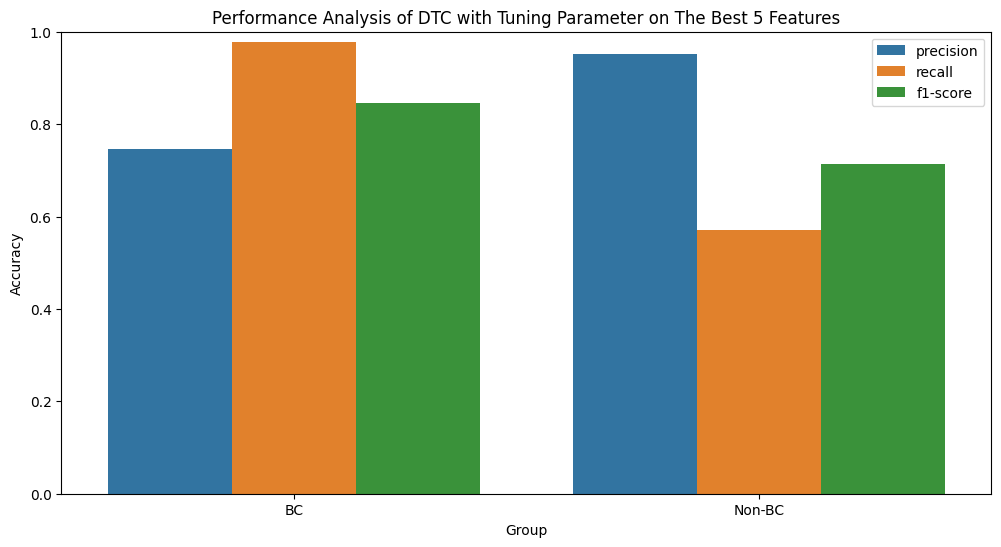

In [22]:
visualization(y_test, y_pred, 'Performance Analysis of DTC with Tuning Parameter on The Best 5 Features', 'Group', 'Accuracy')

In [23]:
# Lakukan cross validation dengan 10 fold dengan StratifiedKFold
clf_best = cross_val_decision_tree(clf, X_train, y_train, X_test, y_test, top_6, n_splits=10, random_state=1)

Best fold is fold-3 with accuracy 0.90625
Test accuracy: 0.8
